In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Data Overview



Data sourse:
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data

In [ ]:
# Pretty large file (> 1GB), will take about 1min to load.
df = pd.read_csv('https://msis510-datasets-public-sdy.s3.us-west-2.amazonaws.com/vehicles.csv')

The dataset is a comprehensive collection of used vehicle listings from Craigslist across the United States. It has been compiled by scraping the platform every few months and contains detailed information about the car sales posted there. There are 426,880 rows, 26 columns. Here's an overview of the information included in the dataset, represented by each column:

- **`id`**: Unique identifier for the listing.
- **`url`**: URL of the vehicle listing on Craigslist.
- **`region`**: Geographic region of the listing.
- **`region_url`**: Craigslist URL for the region.
- **`price`**: The listed price of the car
- **`year`**: Year of the vehicle manufacture.
- **`manufacturer`**: Vehicle manufacturer.
- **`model`**: Specific model of the vehicle.
- **`condition`**: Condition of the vehicle (e.g., new, used, etc.).
- **`cylinders`**: Number of cylinders in the vehicle's engine.
- **`fuel`**: Type of fuel the vehicle uses.
- **`odometer`**: Mileage on the vehicle.
- **`title_status`**: Legal status of the vehicle's title.
- **`transmission`**: Type of vehicle transmission.
- **`VIN`**: Vehicle Identification Number.
- **`drive`**: Type of drivetrain.
- **`size`**: Size category of the vehicle.
- **`type`**: Type of vehicle body.
- **`paint_color`**: Color of the vehicle.
- **`image_url`**: URL of the vehicle's image.
- **`description`**: Description provided in the listing.
- **`county`**: County where the vehicle is located (often missing).
- **`state`**: State where the vehicle is listed. lat: Latitude coordinate for the listing location.
- **`long`**: Longitude coordinate for the listing location.
- **`posting_date`**: Date and time when the listing was posted.

In [ ]:
df.shape

(426880, 26)

In [ ]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


# Data Cleaning

In [ ]:
# check null values share for each column
df.isna().mean()

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64

## Drop Unnecessary Columns

Let's drop the following columns:
- uniqueness columns like `id`, `url`, `image_url`, `VIN`;
- columns we don't consider for analysis like `region` and `region_url`, because we have other columns to indicate location of the car;
- columns with extremely high proportion of missing data like `county` (100% missing values) and `size` (72% missing values)

In [ ]:
df = df.drop(columns=['id', 'url', 'image_url', 'VIN', 'region', 'region_url', 'county', 'size'], axis=1)

## Removing Duplicates

In [ ]:
df.duplicated().sum()

41

In [ ]:
# remove duplicates
df = df.drop_duplicates()
# check: there shouldn't be any duplicates
df.duplicated().sum()

0

There are no duplicates left in the dataset.

## Handling Missing Values

In [ ]:
# check null values share for each column
df.isna().mean()

price           0.000000
year            0.002793
manufacturer    0.041311
model           0.012333
condition       0.407800
cylinders       0.416178
fuel            0.007028
odometer        0.010278
title_status    0.019279
transmission    0.005958
drive           0.305825
type            0.217515
paint_color     0.304998
description     0.000134
state           0.000000
lat             0.015313
long            0.015313
posting_date    0.000129
dtype: float64

Let's remove missing values in columns with a small proportion of those (about 10% in total):

In [ ]:
columns_to_check = ['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'description', 'lat', 'long' , 'posting_date']
# Dropping rows where any of these columns have null value
df = df.dropna(subset=columns_to_check)
df.shape

(383459, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383459 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         383459 non-null  int64  
 1   year          383459 non-null  float64
 2   manufacturer  383459 non-null  object 
 3   model         383459 non-null  object 
 4   condition     231389 non-null  object 
 5   cylinders     223019 non-null  object 
 6   fuel          383459 non-null  object 
 7   odometer      383459 non-null  float64
 8   title_status  383459 non-null  object 
 9   transmission  383459 non-null  object 
 10  drive         269315 non-null  object 
 11  type          301066 non-null  object 
 12  paint_color   271253 non-null  object 
 13  description   383459 non-null  object 
 14  state         383459 non-null  object 
 15  lat           383459 non-null  float64
 16  long          383459 non-null  float64
 17  posting_date  383459 non-null  object 
dtypes: 

All numeric variables don't have missing values now.
<br>Let's see at categorical variables:

In [ ]:
df['condition'].value_counts()

good         114699
excellent     89210
like new      19946
fair           5910
new            1093
salvage         531
Name: condition, dtype: int64

In [ ]:
df['cylinders'].value_counts()

6 cylinders     84745
4 cylinders     69545
8 cylinders     64505
5 cylinders      1521
10 cylinders     1291
other             799
3 cylinders       505
12 cylinders      108
Name: cylinders, dtype: int64

In [ ]:
df['drive'].value_counts()

4wd    120832
fwd     97785
rwd     50698
Name: drive, dtype: int64

In [ ]:
df['type'].value_counts()

sedan          79606
SUV            69884
pickup         40413
truck          31296
other          18549
coupe          16964
hatchback      14948
wagon          10009
van             7224
convertible     6820
mini-van        4530
offroad          549
bus              274
Name: type, dtype: int64

In [ ]:
df['paint_color'].value_counts()

white     70931
black     58414
silver    39928
blue      28961
red       27750
grey      22493
green      6509
brown      6131
custom     6093
orange     1749
yellow     1698
purple      596
Name: paint_color, dtype: int64

Let's replace missing values in categorical columns with the text 'unknown':

In [ ]:
categorical_cols = df.select_dtypes('object').columns
for col in categorical_cols:
  df[col] = df[col].fillna('unknown')

## Removing Outliers

Let's explore the year distribution:

<ipython-input-21-efdfa06111bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year']);


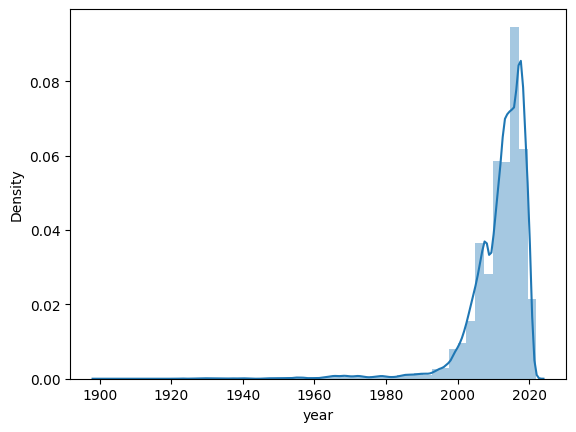

In [ ]:
sns.distplot(df['year']);

Let's only include data starting from 2013:

In [ ]:
df = df[df['year'] >= 2013]

<ipython-input-23-efdfa06111bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year']);


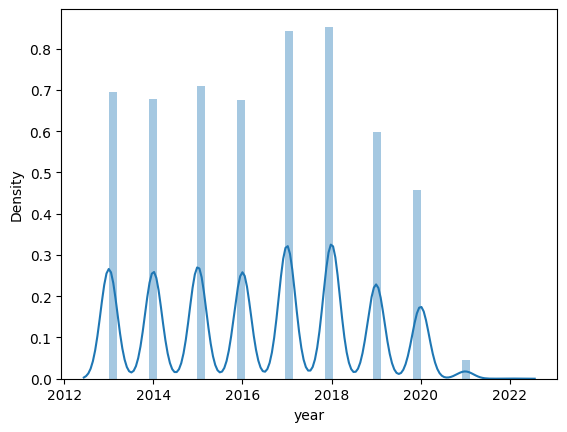

In [ ]:
sns.distplot(df['year']);

Let's also explore 'odometer' parameter:

<ipython-input-24-f4b4ce2b1343>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['odometer']);


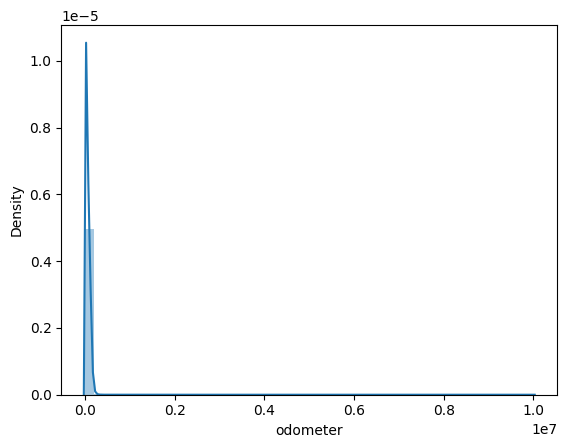

In [ ]:
sns.distplot(df['odometer']);

We see a surge with '0' value. It is definitely an outlier.
<br> Let's  use the IQR (Interquartile Range) method:

In [ ]:
# Q1 (25th percentile) and Q3 (75th percentile) for the 'odometer' column
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1

# define outliers as any values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
lower_bound_odometer = max(Q1 - 1.5 * IQR, 0) # mileage can't be negative
print(f'Lower bound for odometer is {lower_bound_odometer}')
upper_bound_odometer = Q3 + 1.5 * IQR
print(f'Upper bound for odometer is {upper_bound_odometer}')

Lower bound for odometer is 0
Upper bound for odometer is 190271.5


Let's have a values of 1,000 miles as a lower bound, since in our opinion it represents a minimum mileage of a used car in the US:

In [ ]:
# update lower bound
lower_bound_odometer = 1000
# remove outliers from the dataset
df = df[(df['odometer'] >= lower_bound_odometer) & (df['odometer'] <= upper_bound_odometer)]

<ipython-input-27-f4b4ce2b1343>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['odometer']);


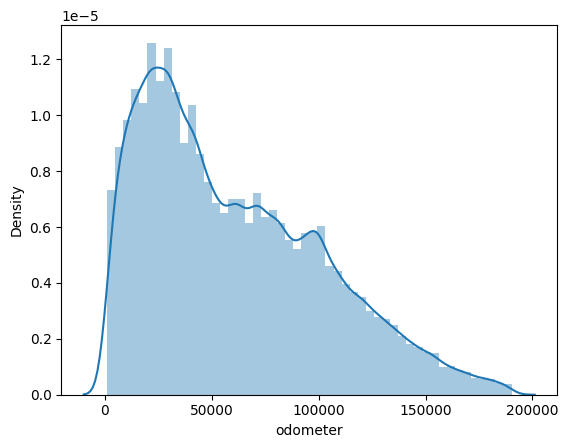

In [ ]:
sns.distplot(df['odometer']);

Let's also explore the price distribution:

<ipython-input-28-f34a5975caef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


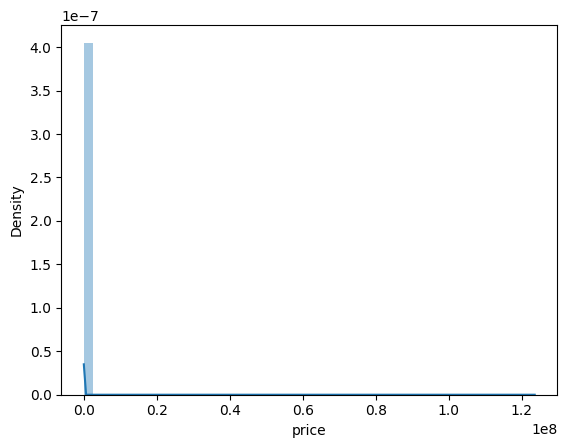

In [ ]:
sns.distplot(df['price']);

For price we see a surge with '0' value. It is definitely an outlier.
<br> Let's  use the IQR (Interquartile Range) method:

In [ ]:
# Q1 (25th percentile) and Q3 (75th percentile) for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# define outliers as any values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
lower_bound_price = max(Q1 - 1.5 * IQR, 0) # price can't be negative
print(f'Lower bound for price is {lower_bound_price}')
upper_bound_price = Q3 + 1.5 * IQR
print(f'Upper bound for price is {upper_bound_price}')

Lower bound for price is 0
Upper bound for price is 62900.0


From the practical point of view it is nearly impossible to buy/sell a car that costs lower than 500 dollars. So we will use \$500 as lower bound for price:

In [ ]:
# update lower bound
lower_bound_price = 1000
# remove outliers from the dataset
df = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]

<ipython-input-31-f34a5975caef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


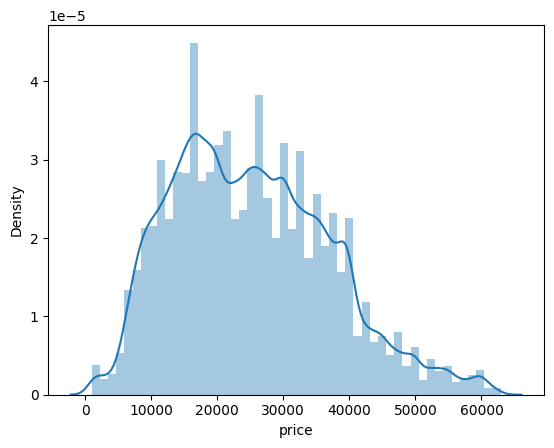

In [ ]:
sns.distplot(df['price']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185853 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         185853 non-null  int64  
 1   year          185853 non-null  float64
 2   manufacturer  185853 non-null  object 
 3   model         185853 non-null  object 
 4   condition     185853 non-null  object 
 5   cylinders     185853 non-null  object 
 6   fuel          185853 non-null  object 
 7   odometer      185853 non-null  float64
 8   title_status  185853 non-null  object 
 9   transmission  185853 non-null  object 
 10  drive         185853 non-null  object 
 11  type          185853 non-null  object 
 12  paint_color   185853 non-null  object 
 13  description   185853 non-null  object 
 14  state         185853 non-null  object 
 15  lat           185853 non-null  float64
 16  long          185853 non-null  float64
 17  posting_date  185853 non-null  object 
dtypes: 

## Data Type Conversion

Let's convert `year` and `odometer` to `int`, and `posting_date` to `datetime`:


In [ ]:
df = df.astype({'year':'int', 'odometer':'int'})

In [ ]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185853 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   price         185853 non-null  int64              
 1   year          185853 non-null  int64              
 2   manufacturer  185853 non-null  object             
 3   model         185853 non-null  object             
 4   condition     185853 non-null  object             
 5   cylinders     185853 non-null  object             
 6   fuel          185853 non-null  object             
 7   odometer      185853 non-null  int64              
 8   title_status  185853 non-null  object             
 9   transmission  185853 non-null  object             
 10  drive         185853 non-null  object             
 11  type          185853 non-null  object             
 12  paint_color   185853 non-null  object             
 13  description   185853 non-null  object      

In [ ]:
df.describe()

,price,year,odometer,lat,long
count,185853.000000,185853.000000,185853.000000,185853.000000,185853.000000
mean,25285.452648,2016.341334,60822.938102,38.339832,-94.354273
std,11969.009000,2.173006,42670.778252,6.044529,17.837498
min,1000.000000,2013.000000,1000.000000,-81.838232,-159.719900
25%,15990.000000,2014.000000,25381.000000,34.081088,-106.680384
50%,23999.000000,2016.000000,51323.000000,38.837700,-88.105874
75%,33590.000000,2018.000000,91000.000000,42.330370,-81.311041
max,62900.000000,2022.000000,190236.000000,64.993698,1.182510


# Feature Engneering

In [ ]:
df['car_age'] = df['posting_date'].dt.year.max() - df['year'] + 1 # models of 2022 are sold in 2021

In [ ]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date,car_age
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,unknown,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04 17:31:18+00:00,8
29,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04 17:31:25+00:00,2
30,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04 15:41:31+00:00,5
31,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03 19:02:03+00:00,9
33,34590,2016,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499,clean,other,4wd,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-03 17:41:33+00:00,6


# Data Modeling

## Lasso Regression

In [ ]:
# Selecting relevant features
features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'lat', 'long', 'car_age']
target = 'price'

In [ ]:
df[features].corr()

<ipython-input-40-bb965c70dc5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[features].corr()


,odometer,lat,long,car_age
odometer,1.000000,0.018068,0.006571,0.656472
lat,0.018068,1.000000,-0.183696,0.014737
long,0.006571,-0.183696,1.000000,0.016598
car_age,0.656472,0.014737,0.016598,1.000000


In [ ]:
X = df[features]
y = df[target]

Let's split the data into training, validation and testing sets:

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((111511, 14), (37171, 14), (37171, 14))

In [ ]:
categorical_cols = [col for col in X_train.columns if
                    X_train[col].dtype == "object"]

numerical_cols = [col for col in X_train.columns if
                  X_train[col].dtype in ['int64', 'float64']]

In [ ]:
# preprocessing for numerical data
numerical_transformer = StandardScaler()

# preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_valid_preprocessed = preprocessor.transform(X_valid)
X_test_preprocessed = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
X_train_preprocessed.shape

(111511, 8217)

In [ ]:
X_valid_preprocessed.shape

(37171, 8217)

In [ ]:
X_test_preprocessed.shape

(37171, 8217)

In [ ]:
%%time
start_lasso = time.process_time()

# Define the Lasso regression model
lasso = Lasso()

# Define the hyperparameter grid to search
param_distributions = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Create the RandomizedSearchCV object
lasso_random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_distributions,
                                         n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
lasso_random_search.fit(X_train_preprocessed, y_train)
# tunning time
time_lasso_random_search = time.process_time() - start_lasso
print("Lasso Regression - tunning time:", time_lasso_random_search)

# Best parameters
print("Lasso Regression - Best parameters:", lasso_random_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Lasso Regression - tunning time: 3192.930928794
Lasso Regression - Best parameters: {'alpha': 0.01}
CPU times: user 45min 2s, sys: 8min 10s, total: 53min 12s
Wall time: 2h 56min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352067343465.8276, tolerance: 1596780169.6939054
  model = cd_fast.sparse_enet_coordinate_descent(


In [ ]:
%%time
start_lasso = time.process_time()
# Predict and evaluate on the validation set
y_valid_pred_lasso = lasso_random_search.predict(X_valid_preprocessed)
# prediction time
time_lasso_prediction = time.process_time() - start_lasso

# Calculate metrics
mae_lasso = mean_absolute_error(y_valid, y_valid_pred_lasso)
mse_lasso = mean_squared_error(y_valid, y_valid_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_valid, y_valid_pred_lasso)

print(f'Lasso Regression - Mean Absolute Error on Validation Set: {mae_lasso}')
print(f'Lasso Regression - Mean Squared Error on Validation Set: {mse_lasso}')
print(f'Lasso Regression - Root Mean Squared Error on Validation Set: {rmse_lasso}')
print(f'Lasso Regression - R-squared on Validation Set: {r2_lasso}')
print('Lasso Regression - Prediction time:', time_lasso_prediction)

Lasso Regression - Mean Absolute Error on Validation Set: 2670.292377370966
Lasso Regression - Mean Squared Error on Validation Set: 17881601.208149593
Lasso Regression - Root Mean Squared Error on Validation Set: 4228.664234501197
Lasso Regression - R-squared on Validation Set: 0.8755538110410261
Lasso Regression - Prediction time: 0.0024234150000665977
CPU times: user 3.31 ms, sys: 1.91 ms, total: 5.22 ms
Wall time: 4.55 ms


## Random Forest Regression

In [ ]:
%%time
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

CPU times: user 1h 14min 48s, sys: 3.17 s, total: 1h 14min 51s
Wall time: 1h 14min 32s


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
%%time
# Predict on the validation set
y_valid_pred_rf = rf_model.predict(X_valid_preprocessed)

# Calculate metrics
mae_rf_valid = mean_absolute_error(y_valid, y_valid_pred_rf)
mse_rf_valid = mean_squared_error(y_valid, y_valid_pred_rf)
rmse_rf_valid = np.sqrt(mse_rf_valid)
r2_rf_valid = r2_score(y_valid, y_valid_pred_rf)

print(f'Random Forest - Mean Absolute Error on Validation Set: {mae_rf_valid}')
print(f'Random Forest - Mean Squared Error on Validation Set: {mse_rf_valid}')
print(f'Random Forest - Root Mean Squared Error on Validation Set: {rmse_rf_valid}')
print(f'Random Forest - R-squared on Validation Set: {r2_rf_valid}')

Random Forest - Mean Absolute Error on Validation Set: 1750.308163508241
Random Forest - Mean Squared Error on Validation Set: 12920465.523915866
Random Forest - Root Mean Squared Error on Validation Set: 3594.5049066479055
Random Forest - R-squared on Validation Set: 0.9100806088162656
CPU times: user 3.11 s, sys: 2.95 ms, total: 3.11 s
Wall time: 3.1 s


## Best Model Testing

The best model on the validation set is Random Forest Regression (n_estimators=200) with R-squared of 0.91. <br>Let's check it's accuracy on the test set:

In [ ]:
%%time
# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test_preprocessed)

# Calculate metrics
mae_rf_test = mean_absolute_error(y_test, y_test_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_test_pred_rf)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, y_test_pred_rf)

print(f'Random Forest - Mean Absolute Error on Test Set: {mae_rf_test}')
print(f'Random Forest - Mean Squared Error on Test Set: {mse_rf_test}')
print(f'Random Forest - Root Mean Squared Error on Test Set: {rmse_rf_test}')
print(f'Random Forest - R-squared on Test Set: {r2_rf_test}')

Random Forest - Mean Absolute Error on Test Set: 1731.4184909058088
Random Forest - Mean Squared Error on Test Set: 12381172.699530268
Random Forest - Root Mean Squared Error on Test Set: 3518.689059796314
Random Forest - R-squared on Test Set: 0.9134224917818229
CPU times: user 3.27 s, sys: 2.94 ms, total: 3.27 s
Wall time: 3.26 s


So the model shows ecen better accuracy on the test set.

# Practical Application

In [ ]:
my_car = {
    'manufacturer': 'bmw',
    'model': 'others',
    'condition': 'excellent',
    'cylinders': '4 cylinders',
    'fuel': 'gas',
    'odometer': 57000,
    'title_status': 'clean',
    'transmission': 'automatic',
    'drive': '4wd',
    'type': 'SUV',
    'paint_color': 'black',
    'lat': 47.6061,
    'long': 122.3328,
    'car_age': 7
}

In [ ]:
my_car_df = pd.DataFrame([my_car])

In [ ]:
my_car_preprocessed = preprocessor.transform(my_car_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
predicted_price_lasso = lasso.predict(my_car_preprocessed)
print("Predicted Price (Lasso):", predicted_price_lasso[0])

Predicted Price (Lasso): 18451.586680776727


In [ ]:
predicted_price_rf = rf_model.predict(my_car_preprocessed)
print("Predicted Price (Random Forest):", predicted_price_rf[0])

Predicted Price (Random Forest): 18032.593333333334
